In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 

In [2]:
df_food_after_pred = pd.read_csv('/Users/dansandler/Proyecto_final_ironhack/final project/df_food_after_pred.csv', sep=',', encoding='utf-8')
df_beverage_after_pred = pd.read_csv('/Users/dansandler/Proyecto_final_ironhack/final project/df_beverage_after_pred.csv', sep=',', encoding='utf-8')

In [3]:
df = pd.concat([df_food_after_pred, df_beverage_after_pred,], ignore_index=True)
df

,nutriscore,product,country,primary_category,secondary_category,ecoscore,energy_kcal_100g,fat_100g,saturated_fat_100g,unsaturated_fat_100g,...,carbs_100g,sugars_100g,fiber_100g,protein_100g,salt_100g,sodium_100g,fruits_veg_nuts_estimate_100g,expected_min_calories,nutriscore_numeric,predicted
0,a,Skyr,France,Milk and dairy products,Dairy desserts,b,57.0,0.2,0.1,0.0,...,3.90,3.90,0.0,10.0,0.09,0.036,0.0,55.45,1.0,False
1,a,Salade de carottes râpées,France,Composite foods,One-dish meals,b,32.0,0.3,0.1,0.0,...,5.30,3.90,0.0,0.9,0.42,0.168,0.0,24.85,1.0,False
2,d,Tarte noix de coco,France,Composite foods,Pizza pies and quiches,unknown,381.0,22.0,15.5,0.0,...,27.30,21.90,4.4,4.6,0.10,0.040,0.0,311.95,4.0,False
3,a,Compote de poire,France,Fruits and vegetables,Fruits,b,157.0,0.0,0.0,0.0,...,36.00,27.00,3.6,0.6,0.00,0.000,0.0,128.40,1.0,False
4,b,Salade de macedoine de légumes,France,Composite foods,One-dish meals,b,143.0,12.7,1.0,0.0,...,3.90,1.00,0.0,1.9,0.27,0.108,0.0,135.55,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775705,e,Jus d´orange,Belgium,Beverages,Fruit juices,c,42.0,0.5,0.1,0.0,...,10.00,10.00,0.0,0.5,0.00,0.000,0.0,41.50,NaN,True
775706,d,ดับเบิ้ลซี,Thailand,Beverages,Waters and flavored waters,not-applicable,21.9,0.0,0.0,0.0,...,5.62,4.38,0.0,0.0,0.00,0.000,0.0,19.67,NaN,True
775707,d,Energy Gym,Japan,Beverages,Sweetened beverages,not-applicable,41.0,0.0,0.0,0.0,...,10.30,0.00,0.0,0.0,0.02,0.008,0.0,36.05,NaN,True
775708,e,fuze tea pesca e rosa,Italy,Beverages,Teas and herbal teas and coffees,c,33.0,0.0,0.0,0.0,...,8.00,8.00,0.0,0.0,0.00,0.000,0.0,28.00,NaN,True


In [4]:
df.predicted.value_counts()

predicted
False    723662
True      52048
Name: count, dtype: int64

In [5]:
df.drop(columns=['nutriscore_numeric'], inplace=True)

In [5]:
df.predicted.value_counts()

predicted
False    723662
True      52048
Name: count, dtype: int64

In [6]:
df

,nutriscore,product,country,primary_category,secondary_category,ecoscore,energy_kcal_100g,fat_100g,saturated_fat_100g,unsaturated_fat_100g,...,cholesterol_100g,carbs_100g,sugars_100g,fiber_100g,protein_100g,salt_100g,sodium_100g,fruits_veg_nuts_estimate_100g,expected_min_calories,predicted
0,a,Skyr,France,Milk and dairy products,Dairy desserts,b,57.0,0.2,0.1,0.0,...,0.0,3.90,3.90,0.0,10.0,0.09,0.036,0.0,55.45,False
1,a,Salade de carottes râpées,France,Composite foods,One-dish meals,b,32.0,0.3,0.1,0.0,...,0.0,5.30,3.90,0.0,0.9,0.42,0.168,0.0,24.85,False
2,d,Tarte noix de coco,France,Composite foods,Pizza pies and quiches,unknown,381.0,22.0,15.5,0.0,...,0.0,27.30,21.90,4.4,4.6,0.10,0.040,0.0,311.95,False
3,a,Compote de poire,France,Fruits and vegetables,Fruits,b,157.0,0.0,0.0,0.0,...,0.0,36.00,27.00,3.6,0.6,0.00,0.000,0.0,128.40,False
4,b,Salade de macedoine de légumes,France,Composite foods,One-dish meals,b,143.0,12.7,1.0,0.0,...,0.0,3.90,1.00,0.0,1.9,0.27,0.108,0.0,135.55,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775705,e,Jus d´orange,Belgium,Beverages,Fruit juices,c,42.0,0.5,0.1,0.0,...,0.0,10.00,10.00,0.0,0.5,0.00,0.000,0.0,41.50,True
775706,d,ดับเบิ้ลซี,Thailand,Beverages,Waters and flavored waters,not-applicable,21.9,0.0,0.0,0.0,...,0.0,5.62,4.38,0.0,0.0,0.00,0.000,0.0,19.67,True
775707,d,Energy Gym,Japan,Beverages,Sweetened beverages,not-applicable,41.0,0.0,0.0,0.0,...,0.0,10.30,0.00,0.0,0.0,0.02,0.008,0.0,36.05,True
775708,e,fuze tea pesca e rosa,Italy,Beverages,Teas and herbal teas and coffees,c,33.0,0.0,0.0,0.0,...,0.0,8.00,8.00,0.0,0.0,0.00,0.000,0.0,28.00,True


In [7]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(775710, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775710 entries, 0 to 775709
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   nutriscore                     775710 non-null  object 
 1   product                        775710 non-null  object 
 2   country                        775710 non-null  object 
 3   primary_category               775710 non-null  object 
 4   secondary_category             775710 non-null  object 
 5   ecoscore                       775710 non-null  object 
 6   energy_kcal_100g               775710 non-null  float64
 7   fat_100g                       775710 non-null  float64
 8   saturated_fat_100g             775710 non-null  float64
 9   unsaturated_fat_100g           775710 non-null  float64
 10  mono_unsaturated_fat_100g      775710 non-null  float64
 11  poly_unsaturated_fat_100g      775710 non-null  float64
 12  trans_fat_100g   

In [8]:
df.describe()

,energy_kcal_100g,fat_100g,saturated_fat_100g,unsaturated_fat_100g,mono_unsaturated_fat_100g,poly_unsaturated_fat_100g,trans_fat_100g,cholesterol_100g,carbs_100g,sugars_100g,fiber_100g,protein_100g,salt_100g,sodium_100g,fruits_veg_nuts_estimate_100g,expected_min_calories
count,7.757100e+05,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000,775710.000000
mean,2.774770e+02,13.014547,4.848219,0.001254,0.260413,0.138629,0.004702,0.008727,30.742920,14.471034,1.455832,7.591237,0.820578,0.328230,11.164792,255.096091
std,1.832729e+02,16.789518,7.254019,0.242405,3.087457,1.533613,0.098937,0.579685,28.150547,19.889889,3.069045,7.550176,1.117066,0.446827,25.257547,174.429496
min,2.760000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.330000,0.000000,0.000000,-4.053013,0.000000
25%,1.110000e+02,0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.100000,0.000000,1.700000,0.042500,0.017000,0.000000,101.150000
50%,2.700000e+02,6.450000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000000,19.230000,4.600000,0.000000,5.880000,0.450000,0.180000,0.000000,246.200000
75%,4.000000e+02,20.150000,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,21.500000,1.800000,10.797455,1.200000,0.480000,5.000000,366.250000
max,1.000000e+03,102.000000,70.000000,90.000000,80.000000,60.000000,5.000000,127.000000,184.000000,100.000000,40.000000,100.000000,10.000000,4.000000,100.000000,918.000000


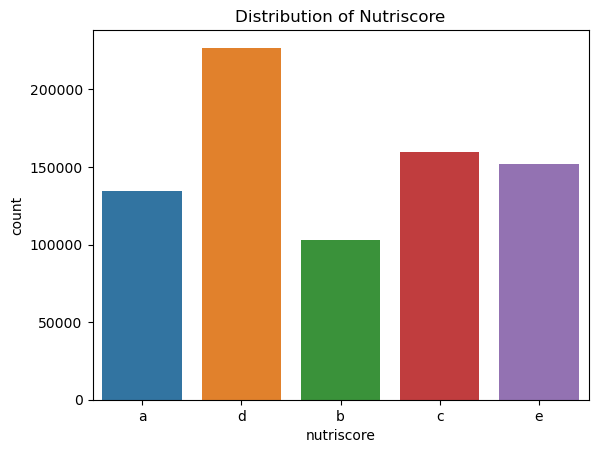

In [9]:
sns.countplot(x='nutriscore', data=df)
plt.title('Distribution of Nutriscore')
plt.show()


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

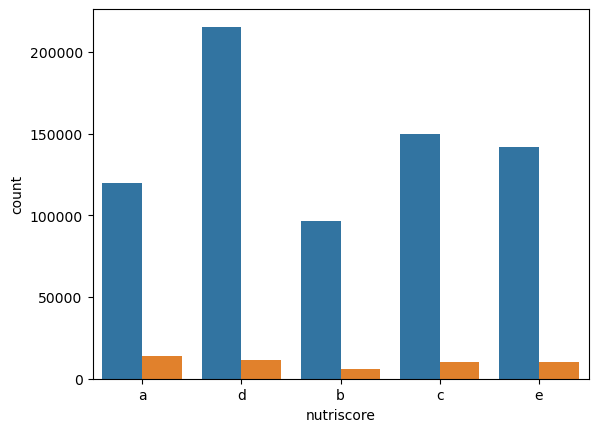

In [10]:
sns.countplot(x='nutriscore', hue='predicted', data=df)
plt.title('Nutriscore Distribution: Predicted vs. Original')
plt.show()


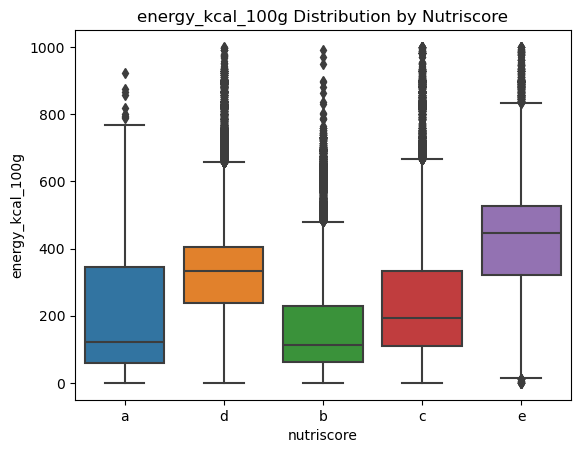

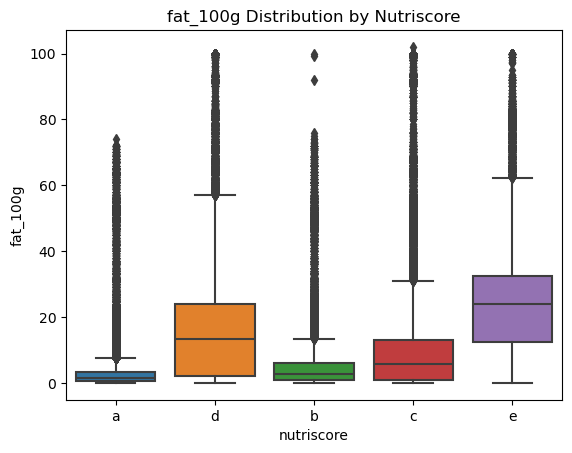

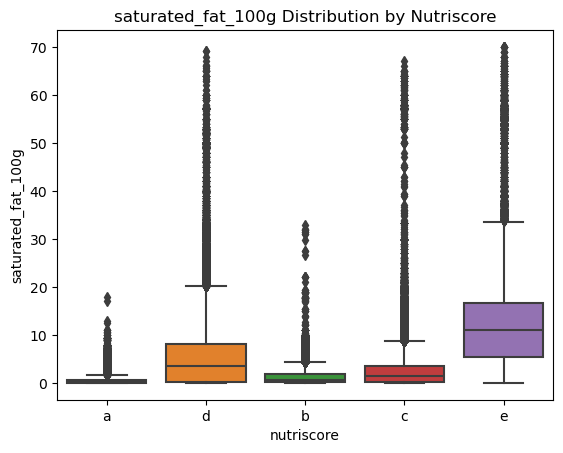

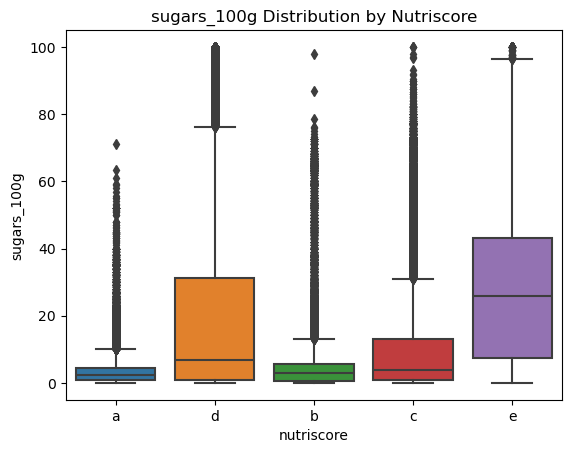

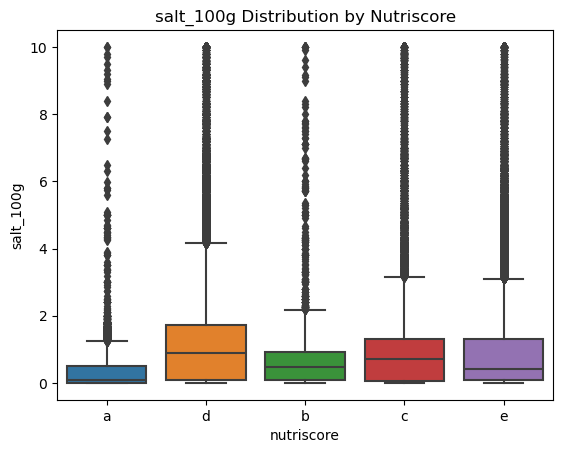

In [11]:
for col in ['energy_kcal_100g', 'fat_100g', 'saturated_fat_100g', 'sugars_100g', 'salt_100g']:
    sns.boxplot(x='nutriscore', y=col, data=df)
    plt.title(f'{col} Distribution by Nutriscore')
    plt.show()


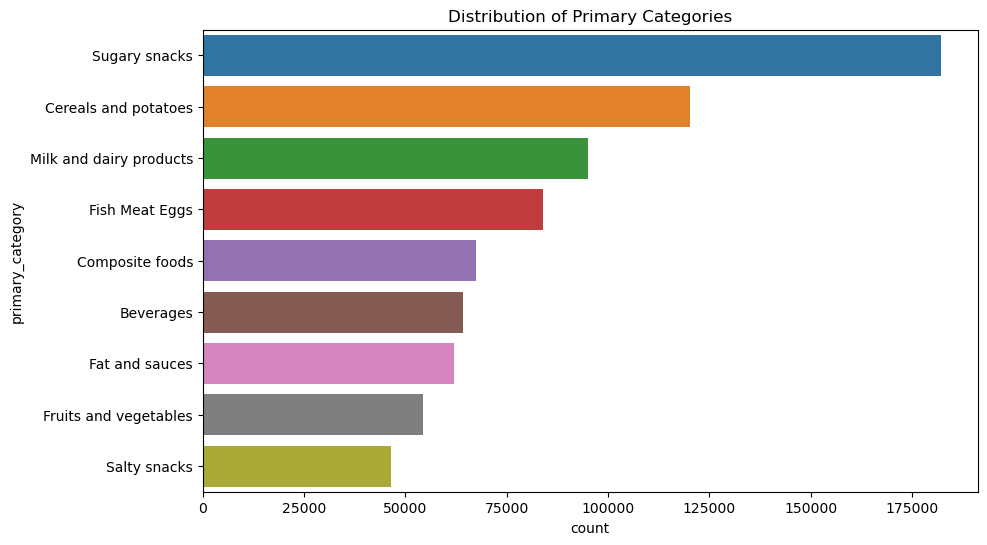

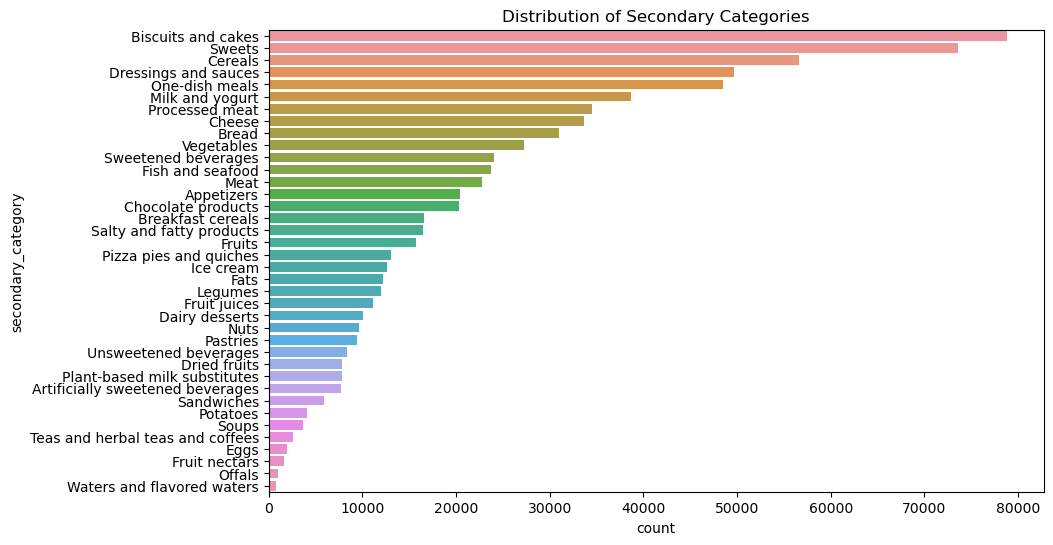

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='primary_category', data=df, order=df['primary_category'].value_counts().index)
plt.title('Distribution of Primary Categories')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='secondary_category', data=df, order=df['secondary_category'].value_counts().index)
plt.title('Distribution of Secondary Categories')
plt.show()


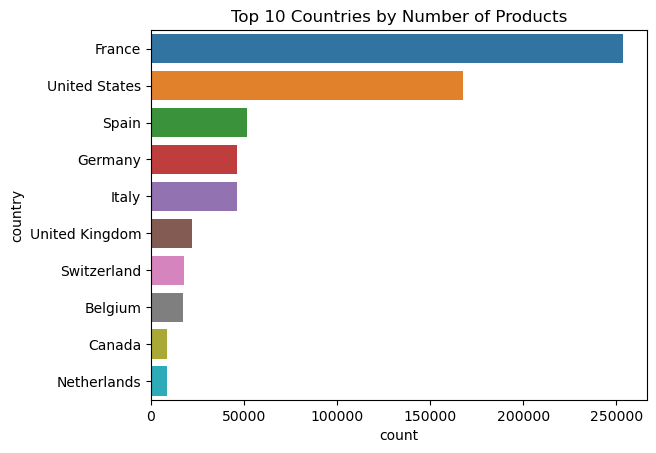

In [13]:
top_countries = df['country'].value_counts().nlargest(10).index
sns.countplot(y='country', data=df[df['country'].isin(top_countries)], order=top_countries)
plt.title('Top 10 Countries by Number of Products')
plt.show()


In [14]:
pd.set_option('display.max_rows', None)
df.country.value_counts()

country
France                                                                                                                                                                                                                                                                                                                               253700
United States                                                                                                                                                                                                                                                                                                                        167753
Spain                                                                                                                                                                                                                                                                                                                                 51

In [6]:
# Create a unique Product ID column (if you have a 'product' column, you can use that)
df['product_id'] = range(1, len(df) + 1)

# Separate countries into individual rows
df_expanded = df.assign(country=df['country'].str.split(',')).explode('country')

# Reset index for cleanliness
df_expanded.reset_index(drop=True, inplace=True)



In [7]:
df_expanded.country.unique()

array(['France', 'United States', 'Canada', 'Belgium', 'Germany', 'Italy',
       'United Kingdom', 'Spain', 'World', 'Bulgaria', 'Netherlands',
       'Australia', 'Mexico', 'Switzerland', 'India', 'Ireland',
       'Czech Republic', 'Luxembourg', 'Slovakia', 'Hungary', 'Bolivia',
       'New Zealand', 'Puerto Rico', 'Thailand', 'Guam',
       'French Polynesia', 'Egypt', 'Monaco', 'Haiti', 'Singapore',
       'Hong Kong', 'Croatia', 'Francuska', 'Hrvatska', 'Irska',
       'Njemačka', 'Sjedinjene-američke-države', 'Švicarska', 'Taiwan',
       'Morocco', 'Norway', 'Dominican Republic', 'Panama', 'Costa Rica',
       'Colombia', 'Etats-unis', 'Argentina', 'Sweden', 'Nederland',
       'Austria', 'Vietnam', 'Martinique', 'Philippines', 'Guadeloupe',
       'Sint Maarten', 'Royaume-uni', 'Jersey', 'Lebanon',
       'United Arab Emirates', 'New Caledonia', 'Brazil', 'Andorra',
       'Poland', 'Israel',
       'Made-in-canada-from-domestic-and-imported-ingredients', 'Bermuda',
       'Ku

In [8]:
df_expanded.country.nunique()

385

In [9]:
df_expanded

,nutriscore,product,country,primary_category,secondary_category,ecoscore,energy_kcal_100g,fat_100g,saturated_fat_100g,unsaturated_fat_100g,...,carbs_100g,sugars_100g,fiber_100g,protein_100g,salt_100g,sodium_100g,fruits_veg_nuts_estimate_100g,expected_min_calories,predicted,product_id
0,a,Skyr,France,Milk and dairy products,Dairy desserts,b,57.0,0.2,0.1,0.0,...,3.90,3.90,0.0,10.0,0.09,0.036,0.0,55.45,False,1
1,a,Salade de carottes râpées,France,Composite foods,One-dish meals,b,32.0,0.3,0.1,0.0,...,5.30,3.90,0.0,0.9,0.42,0.168,0.0,24.85,False,2
2,d,Tarte noix de coco,France,Composite foods,Pizza pies and quiches,unknown,381.0,22.0,15.5,0.0,...,27.30,21.90,4.4,4.6,0.10,0.040,0.0,311.95,False,3
3,a,Compote de poire,France,Fruits and vegetables,Fruits,b,157.0,0.0,0.0,0.0,...,36.00,27.00,3.6,0.6,0.00,0.000,0.0,128.40,False,4
4,b,Salade de macedoine de légumes,France,Composite foods,One-dish meals,b,143.0,12.7,1.0,0.0,...,3.90,1.00,0.0,1.9,0.27,0.108,0.0,135.55,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883028,e,Jus d´orange,Belgium,Beverages,Fruit juices,c,42.0,0.5,0.1,0.0,...,10.00,10.00,0.0,0.5,0.00,0.000,0.0,41.50,True,775706
883029,d,ดับเบิ้ลซี,Thailand,Beverages,Waters and flavored waters,not-applicable,21.9,0.0,0.0,0.0,...,5.62,4.38,0.0,0.0,0.00,0.000,0.0,19.67,True,775707
883030,d,Energy Gym,Japan,Beverages,Sweetened beverages,not-applicable,41.0,0.0,0.0,0.0,...,10.30,0.00,0.0,0.0,0.02,0.008,0.0,36.05,True,775708
883031,e,fuze tea pesca e rosa,Italy,Beverages,Teas and herbal teas and coffees,c,33.0,0.0,0.0,0.0,...,8.00,8.00,0.0,0.0,0.00,0.000,0.0,28.00,True,775709


In [10]:
country_mapping = {
    'France': 'France',
    'United States': 'United States',
    'Canada': 'Canada',
    'Belgium': 'Belgium',
    'Germany': 'Germany',
    'Italy': 'Italy',
    'United Kingdom': 'United Kingdom',
    'Spain': 'Spain',
    'World': None,  # Exclude from mapping
    'Bulgaria': 'Bulgaria',
    'Netherlands': 'Netherlands',
    'Australia': 'Australia',
    'Mexico': 'Mexico',
    'Switzerland': 'Switzerland',
    'India': 'India',
    'Ireland': 'Ireland',
    'Czech Republic': 'Czech Republic',
    'Luxembourg': 'Luxembourg',
    'Slovakia': 'Slovakia',
    'Hungary': 'Hungary',
    'Bolivia': 'Bolivia',
    'New Zealand': 'New Zealand',
    'Puerto Rico': 'Puerto Rico',
    'Thailand': 'Thailand',
    'Guam': 'Guam',
    'French Polynesia': 'French Polynesia',
    'Egypt': 'Egypt',
    'Monaco': 'Monaco',
    'Haiti': 'Haiti',
    'Singapore': 'Singapore',
    'Hong Kong': 'Hong Kong',
    'Croatia': 'Croatia',
    'Francuska': 'France',
    'Hrvatska': 'Croatia',
    'Irska': 'Ireland',
    'Njemačka': 'Germany',
    'Sjedinjene-američke-države': 'United States',
    'Švicarska': 'Switzerland',
    'Taiwan': 'Taiwan',
    'Morocco': 'Morocco',
    'Norway': 'Norway',
    'Dominican Republic': 'Dominican Republic',
    'Panama': 'Panama',
    'Costa Rica': 'Costa Rica',
    'Colombia': 'Colombia',
    'Etats-unis': 'United States',
    'Argentina': 'Argentina',
    'Sweden': 'Sweden',
    'Nederland': 'Netherlands',
    'Austria': 'Austria',
    'Vietnam': 'Vietnam',
    'Martinique': 'Martinique',
    'Philippines': 'Philippines',
    'Guadeloupe': 'Guadeloupe',
    'Sint Maarten': 'Sint Maarten',
    'Royaume-uni': 'United Kingdom',
    'Jersey': 'Jersey',
    'Lebanon': 'Lebanon',
    'United Arab Emirates': 'United Arab Emirates',
    'New Caledonia': 'New Caledonia',
    'Brazil': 'Brazil',
    'Andorra': 'Andorra',
    'Poland': 'Poland',
    'Israel': 'Israel',
    'Made-in-canada-from-domestic-and-imported-ingredients': None,  # Exclude from mapping
    'Bermuda': 'Bermuda',
    'Kuwait': 'Kuwait',
    'Portugal': 'Portugal',
    'Romania': 'Romania',
    'Réunion': 'Réunion',
    'China': 'China',
    'Malaysia': 'Malaysia',
    'Ecuador': 'Ecuador',
    'Chile': 'Chile',
    'Allemagne': 'Germany',
    'Estados-unidos': 'United States',
    'Francia': 'France',
    'Ukraine': 'Ukraine',
    'Republic-of-macedonia': 'North Macedonia',
    'Japan': 'Japan',
    'Finland': 'Finland',
    'Denmark': 'Denmark',
    'Guyana': 'Guyana',
    'アメリカ合衆国': 'United States',
    'Saudi Arabia': 'Saudi Arabia',
    'Barbados': 'Barbados',
    'Virgin Islands of the United States': 'Virgin Islands',
    'Saint Kitts and Nevis': 'Saint Kitts and Nevis',
    'Guatemala': 'Guatemala',
    'Slovenia': 'Slovenia',
    'Jamaica': 'Jamaica',
    'Bahrain': 'Bahrain',
    'Oman': 'Oman',
    'Pakistan': 'Pakistan',
    'Venezuela': 'Venezuela',
    'Malta': 'Malta',
    'Trinidad and Tobago': 'Trinidad and Tobago',
    'Suriname': 'Suriname',
    'Vereinigte-staaten-von-amerika': 'United States',
    'El Salvador': 'El Salvador',
    'Honduras': 'Honduras',
    'Nicaragua': 'Nicaragua',
    'Paraguay': 'Paraguay',
    'Peru': 'Peru',
    'Uruguay': 'Uruguay',
    'Turkey': 'Turkey',
    'Anguilla': 'Anguilla',
    'The Bahamas': 'The Bahamas',
    'Saint Martin': 'Saint Martin',
    'En': None,  # Exclude from mapping
    'Mali': 'Mali',
    'Mauritius': 'Mauritius',
    'Kanada': 'Canada',
    'Schweiz': 'Switzerland',
    "Côte d'Ivoire": 'Ivory Coast',
    'Product-of-usa-packed-in-canada-imported-by-strong-international-trading-inc-richmond-bc-www-siti-ca': None,  # Exclude from mapping
    'Iceland': 'Iceland',
    'Saint Lucia': 'Saint Lucia',
    'Cambodia': 'Cambodia',
    'Bangladesh': 'Bangladesh',
    'Greece': 'Greece',
    'Reino-unido': 'United Kingdom',
    'Deutschland': 'Germany',
    'Frankreich': 'France',
    'Russia': 'Russia',
    'Grenada': 'Grenada',
    'Isle of Man': 'Isle of Man',
    'Senegal': 'Senegal',
    'Aruba': 'Aruba',
    'Togo': 'Togo',
    'Francja': 'France',
    'Dominica': 'Dominica',
    'Saint Pierre and Miquelon': 'Saint Pierre and Miquelon',
    'Qatar': 'Qatar',
    'Belgique': 'Belgium',
    'Suisse': 'Switzerland',
    'fr:en-fr': None,  # Exclude from mapping
    'Benin': 'Benin',
    'Mauritania': 'Mauritania',
    'Polynesie-francaise': 'French Polynesia',
    'Laos': 'Laos',
    'Algeria': 'Algeria',
    'Guernsey': 'Guernsey',
    'England': 'United Kingdom',
    'Ghana': 'Ghana',
    'Guinea': 'Guinea',
    'South Africa': 'South Africa',
    'Frankrijk': 'France',
    'Stati-uniti-d-america': 'United States',
    'Gabon': 'Gabon',
    'Burkina Faso': 'Burkina Faso',
    'Stany-zjednoczone': 'United States',
    'Hawaii': 'Hawaii',
    'South Korea': 'South Korea',
    'Franca': 'France',
    'Alemania': 'Germany',
    'Indonesia': 'Indonesia',
    'Tunisia': 'Tunisia',
    'Zambia': 'Zambia',
    'Curaçao': 'Curaçao',
    'Serbia': 'Serbia',
    'French Guiana': 'French Guiana',
    'Nigeria': 'Nigeria',
    'Cuba': 'Cuba',
    'Democratic Republic of the Congo': 'Democratic Republic of the Congo',
    'Maroc': 'Morocco',
    'Brunei': 'Brunei',
    'Cayman Islands': 'Cayman Islands',
    'Latvia': 'Latvia',
    'Belgica': 'Belgium',
    'Australien': 'Australia',
    'Iran': 'Iran',
    'Belleville-wa': None,  # Exclude from mapping
    'Wa-usa': None,  # Exclude from mapping
    'Lithuania': 'Lithuania',
    'Iraq': 'Iraq',
    'Bellingham-wa-usa': None,  # Exclude from mapping
    'Česko': 'Czech Republic',
    'Chili': 'Chile',
    'Espagne': 'Spain',
    'Cyprus': 'Cyprus',
    'Belarus': 'Belarus',
    'Yugoslavia': 'Yugoslavia',
    'es:mŕxico': 'Mexico',
    'European Union': None,  # Exclude from mapping
    'Turkiye': 'Turkey',
    'Estonia': 'Estonia',
    'La-reunion': 'Réunion',
    'nl:belgie': 'Belgium',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'North Macedonia': 'North Macedonia',
    'Republic of the Congo': 'Republic of the Congo',
    'Corsica': None,  # Exclude from mapping
    'Sverige': 'Sweden',
    'France-switzerland-germany': None,  # Exclude from mapping
    'Suiza': 'Switzerland',
    'Mozambique': 'Mozambique',
    'Irland': 'Ireland',
    'Francia-espana': None,  # Exclude from mapping
    'Myanmar': 'Myanmar',
    'Republika Srpska': 'Republika Srpska',
    'Cameroon': 'Cameroon',
    'Mayotte': 'Mayotte',
    'Spanien': 'Spain',
    'Kenya': 'Kenya',
    'Åland Islands': 'Åland Islands',
    'France-spain': None,  # Exclude from mapping
    'Gibraltar': 'Gibraltar',
    'Belgie': 'Belgium',
    'bg:allemagne': 'Germany',
    'bg:angle': None,  # Exclude from mapping
    'bg:angleterre': 'United Kingdom',
    'bg:belgique': 'Belgium',
    'bg:bulgarie': 'Bulgaria',
    'bg:espagne': 'Spain',
    'bg:grèce': 'Greece',
    'bg:indonésie': 'Indonesia',
    'bg:international': None,  # Exclude from mapping
    'bg:irak': 'Iraq',
    'bg:irlande': 'Ireland',
    'bg:liban': 'Lebanon',
    'bg:royaume-uni': 'United Kingdom',
    'bg:émirats-arabes-unis': 'United Arab Emirates',
    'Angle': None,  # Exclude from mapping
    'Angleterre': 'United Kingdom',
    'Emirats-arabes-unis': 'United Arab Emirates',
    'Indonesie': 'Indonesia',
    'International': None,  # Exclude from mapping
    'Irlande': 'Ireland',
    'Liban': 'Lebanon',
    'fr:angle': None,  # Exclude from mapping
    'fr:angleterre': 'United Kingdom',
    'fr:international': None,  # Exclude from mapping
    'Niger': 'Niger',
    'Afghanistan': 'Afghanistan',
    'Macau': 'Macau',
    'Kazakhstan': 'Kazakhstan',
    'fr:value': None,  # Exclude from mapping
    'fr:dom-tom': None,  # Exclude from mapping
    'Dom-tom': None,  # Exclude from mapping
    'fr:frankreich': 'France',
    'fr:francia': 'France',
    'Wallis and Futuna': 'Wallis and Futuna',
    'Djibouti': 'Djibouti',
    'Seychelles': 'Seychelles',
    'Liechtenstein': 'Liechtenstein',
    'Libya': 'Libya',
    'Vanuatu': 'Vanuatu',
    'fr:belgica': 'Belgium',
    'Albania': 'Albania',
    'Sri Lanka': 'Sri Lanka',
    'Mongolia': 'Mongolia',
    'Madagascar': 'Madagascar',
    'fr:france-la-reunion': 'Réunion',
    'fr:deutschland': 'Germany',
    'Pologne': 'Poland',
    'Roumanie': 'Romania',
    'fr:martinica': 'Martinique',
    'Grece': 'Greece',
    'fr:suiza': 'Switzerland',
    'es:espagne': 'Spain',
    'Jordan': 'Jordan',
    'fr:polonia': 'Poland',
    'Galmudug': None,  # Exclude from mapping
    'fr:schweiz': 'Switzerland',
    'Faroe Islands': 'Faroe Islands',
    'fr:europa': None,  # Exclude from mapping
    'fr:europe': None,  # Exclude from mapping
    'Georgia': 'Georgia',
    'Montenegro': 'Montenegro',
    'Kosovo': 'Kosovo',
    'Armenia': 'Armenia',
    'fr:belgien': 'Belgium',
    'Moldova': 'Moldova',
    'Niemcy': 'Germany',
    'Polska': 'Poland',
    'Ethiopia': 'Ethiopia',
    'de:frankrijk': 'France',
    'de:nederland': 'Netherlands',
    'de:zwitserland': 'Switzerland',
    'Swaziland': 'Eswatini',
    'de:allemagne': 'Germany',
    'East Germany': 'East Germany',
    'Germa': None,  # Exclude from mapping
    'Scotland': None,  # Exclude from mapping
    'Belgien': 'Belgium',
    'Ireland-uk': 'United Kingdom',
    'Romani': None,  # Exclude from mapping
    'fr:nouvelle-aquitaine': None,  # Exclude from mapping
    'fr:virazeil': None,  # Exclude from mapping
    'San Marino': 'San Marino',
    'de:francie': 'France',
    'de:německo': 'Germany',
    'de:rakousko': 'Austria',
    'de:česko': 'Czech Republic',
    'de:švýcarsko': 'Switzerland',
    'de:autriche': 'Austria',
    'de:lucembursko': 'Luxembourg',
    'de:république-tchèque': 'Czech Republic',
    'de:suiza': 'Switzerland',
    'de:deut': 'Germany',
    'Uzbekistan': 'Uzbekistan',
    'Kyrgyzstan': 'Kyrgyzstan',
    'Tajikistan': 'Tajikistan',
    'Azerbaijan': 'Azerbaijan',
    'Україна': 'Ukraine',
    'Palau': 'Palau',
    '日本': 'Japan',
    'ישראל': 'Israel',
    'Antigua and Barbuda': 'Antigua and Barbuda',
    'Cape Verde': 'Cape Verde',
    'Rwanda': 'Rwanda',
    'Somalia': 'Somalia',
    'Sudan': 'Sudan',
    'Syria': 'Syria',
    'Northern-ireland': 'Northern Ireland',
    'Wales': 'Wales',
    'Ελλάδα': 'Greece',
    'Sierra Leone': 'Sierra Leone',
    'Worldwide': None,  # Exclude from mapping
    'fr:frankrijk': 'France',
    'fr:nederland': 'Netherlands',
    'fr:luxemburgo': 'Luxembourg',
    'de:belgique': 'Belgium',
    'de:alemanha': 'Germany',
    'de:bélgica': 'Belgium',
    'de:espanha': 'Spain',
    'de:frança': 'France',
    'de:luxemburgo': 'Luxembourg',
    'de:países-baixos': 'Netherlands',
    'de:alemania': 'Germany',
    'Comoros': 'Comoros',
    'Sao Tomé and Príncipe': 'São Tomé and Príncipe',
    'Angola': 'Angola',
    'Palestinian territories': 'Palestine',
    'ca:franca': 'France',
    'Namibia': 'Namibia',
    'Lesotho': 'Lesotho',
    'Botswana': 'Botswana',
    'Zimbabwe': 'Zimbabwe',
    'Marruecos': 'Morocco',
    'Algerie': 'Algeria',
    'Verenigde-staten-van-amerika': 'United States',
    'السعودية': 'Saudi Arabia',
    'Middle-east': None,  # Exclude from mapping
    'Yemen': 'Yemen',
    'Mexique': 'Mexico',
    'Japon': 'Japan',
    'Brazil-en-france': None,  # Exclude from mapping
    'Bhutan': 'Bhutan',
    'Nepal': 'Nepal',
    'Saint Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Vatican City': 'Vatican City',
    'North Korea': 'North Korea',
    'es:cantabria': None,  # Exclude from mapping
    'es:santona': None,  # Exclude from mapping
    'Equatorial Guinea': 'Equatorial Guinea',
    'Liberia': 'Liberia',
    'Cocoa-horizons': None,  # Exclude from mapping
    'Caribbean Netherlands': 'Caribbean Netherlands',
    'Fiji': 'Fiji',
    'Maldives': 'Maldives',
    'American Samoa': 'American Samoa',
    'South Sudan': 'South Sudan',
    'Coquitlam-bc': None,  # Exclude from mapping
    'Niederlande': 'Netherlands',
    'Tanzania': 'Tanzania',
    'المغرب': 'Morocco',
    'Iraqi Kurdistan': None,  # Exclude from mapping
    'Belize': 'Belize',
    'Papua New Guinea': 'Papua New Guinea',
    'Cook Islands': 'Cook Islands',
    'ประเทศไทย-thai': 'Thailand',
    'Suecia': 'Sweden',
    'fr:deutschland': 'Germany',
    'fr:polonia': 'Poland',
    'fr:swiss': 'Switzerland',
    'Canada-english': 'Canada',
    'Cambodge': 'Cambodia',
    'Lesotho': 'Lesotho',
    'St Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Ecuador': 'Ecuador',
    'Japan': 'Japan',
    'Laos': 'Laos',
    'Taiwan': 'Taiwan',
    'Kazakhstan': 'Kazakhstan',
    'Tajikistan': 'Tajikistan',
    'Armenia': 'Armenia',
    'Jordan': 'Jordan',
    'Syria': 'Syria',
    'Saudi Arabia': 'Saudi Arabia',
    'Brunei': 'Brunei',
    'Mongolia': 'Mongolia',
    'Nepal': 'Nepal',
    'Bhutan': 'Bhutan',
    'Myanmar': 'Myanmar',
    'Palestinian territories': 'Palestine',
    'Fiji': 'Fiji',
    'American Samoa': 'American Samoa',
    'Saint Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Guam': 'Guam',
    'Philippines': 'Philippines',
    'Togo': 'Togo',
    'Botswana': 'Botswana',
    'Namibia': 'Namibia',
    'Lesotho': 'Lesotho',
    'Zimbabwe': 'Zimbabwe',
    'Moldova': 'Moldova',
    'Armenia': 'Armenia',
    'Kazakhstan': 'Kazakhstan',
    'Turkmenistan': 'Turkmenistan',
    'Afghanistan': 'Afghanistan',
    'Palestinian territories': 'Palestine',
    'Bhutan': 'Bhutan',
    'Nepal': 'Nepal',
    'Bhutan': 'Bhutan',
    'Myanmar': 'Myanmar',
    'Cayman Islands': 'Cayman Islands',
    'Congo': 'Congo',
    'Benin': 'Benin',
    'Oman': 'Oman',
    'Saint Kitts and Nevis': 'Saint Kitts and Nevis',
    'Saint Lucia': 'Saint Lucia',
    'Lebanon': 'Lebanon',
    'Ecuador': 'Ecuador',
    'Guatemala': 'Guatemala',
    'North Korea': 'North Korea',
    'South Korea': 'South Korea',
    'Kazakhstan': 'Kazakhstan',
    'Mongolia': 'Mongolia',
    'Palestinian territories': 'Palestine',
    'Bhutan': 'Bhutan',
    'Nepal': 'Nepal',
    'American Samoa': 'American Samoa',
    'Fiji': 'Fiji',
    'Ecuador': 'Ecuador',
    'Guatemala': 'Guatemala',
    'Peru': 'Peru',
    'Nepal': 'Nepal',
    'Bhutan': 'Bhutan',
    'Saint Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'American Samoa': 'American Samoa',
    'Papua New Guinea': 'Papua New Guinea',
    'Papua New Guinea': 'Papua New Guinea',
    'Belize': 'Belize',
    'Caribbean Netherlands': 'Caribbean Netherlands',
    'Armenia': 'Armenia',
    'New Zealand': 'New Zealand',
    'Fiji': 'Fiji',
    'Maldives': 'Maldives',
    'South Sudan': 'South Sudan',
    'Côte d\'Ivoire': 'Ivory Coast',
    'Botswana': 'Botswana',
    'Brunei': 'Brunei',
    'Niger': 'Niger',
    'Jamaica': 'Jamaica',
    'Armenia': 'Armenia',
    'Vanuatu': 'Vanuatu',
    'Lesotho': 'Lesotho',
    'Belize': 'Belize',
    'Guinea': 'Guinea',
    'Botswana': 'Botswana',
    'Papua New Guinea': 'Papua New Guinea',
    'South Sudan': 'South Sudan',
    'Moldova': 'Moldova',
    'New Zealand': 'New Zealand',
    'Vanuatu': 'Vanuatu',
    'Fiji': 'Fiji',
    'South Korea': 'South Korea',
    'Nepal': 'Nepal',
    'Nepal': 'Nepal',
    'Sri Lanka': 'Sri Lanka',
    'Iceland': 'Iceland',
    'Haiti': 'Haiti',
    'Iran': 'Iran',
    'Lebanon': 'Lebanon',
    'Greece': 'Greece',
    'South Sudan': 'South Sudan',
    'Somalia': 'Somalia',
    'Niger': 'Niger',
    'Haiti': 'Haiti',
    'Seychelles': 'Seychelles',
    'Ethiopia': 'Ethiopia',
    'Lesotho': 'Lesotho',
    'Seychelles': 'Seychelles',
    'Vanuatu': 'Vanuatu',
    'Nepal': 'Nepal',
    'Papua New Guinea': 'Papua New Guinea',
    'Botswana': 'Botswana',
    'Nepal': 'Nepal',
    'Fiji': 'Fiji',
    'South Sudan': 'South Sudan',
    'Zimbabwe': 'Zimbabwe',
    'Rwanda': 'Rwanda',
    'Seychelles': 'Seychelles',
    'Papua New Guinea': 'Papua New Guinea',
    'Botswana': 'Botswana',
}

In [11]:
# Apply the mapping to the 'country' column
df_expanded['country'] = df_expanded['country'].map(country_mapping).fillna('Unknown')


In [12]:
df_expanded['country'].value_counts().get('Unknown', 0)

12926

In [14]:
# Convert the 'nutriscore' column values to uppercase
df_expanded['nutriscore'] = df_expanded['nutriscore'].str.upper()


In [15]:
df_expanded

,nutriscore,product,country,primary_category,secondary_category,ecoscore,energy_kcal_100g,fat_100g,saturated_fat_100g,unsaturated_fat_100g,...,carbs_100g,sugars_100g,fiber_100g,protein_100g,salt_100g,sodium_100g,fruits_veg_nuts_estimate_100g,expected_min_calories,predicted,product_id
0,A,Skyr,France,Milk and dairy products,Dairy desserts,b,57.0,0.2,0.1,0.0,...,3.90,3.90,0.0,10.0,0.09,0.036,0.0,55.45,False,1
1,A,Salade de carottes râpées,France,Composite foods,One-dish meals,b,32.0,0.3,0.1,0.0,...,5.30,3.90,0.0,0.9,0.42,0.168,0.0,24.85,False,2
2,D,Tarte noix de coco,France,Composite foods,Pizza pies and quiches,unknown,381.0,22.0,15.5,0.0,...,27.30,21.90,4.4,4.6,0.10,0.040,0.0,311.95,False,3
3,A,Compote de poire,France,Fruits and vegetables,Fruits,b,157.0,0.0,0.0,0.0,...,36.00,27.00,3.6,0.6,0.00,0.000,0.0,128.40,False,4
4,B,Salade de macedoine de légumes,France,Composite foods,One-dish meals,b,143.0,12.7,1.0,0.0,...,3.90,1.00,0.0,1.9,0.27,0.108,0.0,135.55,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883028,E,Jus d´orange,Belgium,Beverages,Fruit juices,c,42.0,0.5,0.1,0.0,...,10.00,10.00,0.0,0.5,0.00,0.000,0.0,41.50,True,775706
883029,D,ดับเบิ้ลซี,Thailand,Beverages,Waters and flavored waters,not-applicable,21.9,0.0,0.0,0.0,...,5.62,4.38,0.0,0.0,0.00,0.000,0.0,19.67,True,775707
883030,D,Energy Gym,Japan,Beverages,Sweetened beverages,not-applicable,41.0,0.0,0.0,0.0,...,10.30,0.00,0.0,0.0,0.02,0.008,0.0,36.05,True,775708
883031,E,fuze tea pesca e rosa,Italy,Beverages,Teas and herbal teas and coffees,c,33.0,0.0,0.0,0.0,...,8.00,8.00,0.0,0.0,0.00,0.000,0.0,28.00,True,775709


In [16]:
df_expanded.energy_kcal_100g.max()

1000.0

In [15]:
df_expanded.to_csv('/Users/dansandler/Proyecto_final_ironhack/final project/EDA.csv', index=False)

In [16]:
composite_foods_df = df_expanded[df_expanded['primary_category'] == 'Composite foods']
composite_foods_df

,nutriscore,product,country,primary_category,secondary_category,ecoscore,energy_kcal_100g,fat_100g,saturated_fat_100g,unsaturated_fat_100g,...,carbs_100g,sugars_100g,fiber_100g,protein_100g,salt_100g,sodium_100g,fruits_veg_nuts_estimate_100g,expected_min_calories,predicted,product_id
1,A,Salade de carottes râpées,France,Composite foods,One-dish meals,b,32.0,0.300000,0.1,0.0,...,5.3,3.9,0.0,0.9,0.42,0.168,0.0,24.850000,False,2
2,D,Tarte noix de coco,France,Composite foods,Pizza pies and quiches,unknown,381.0,22.000000,15.5,0.0,...,27.3,21.9,4.4,4.6,0.10,0.040,0.0,311.950000,False,3
4,B,Salade de macedoine de légumes,France,Composite foods,One-dish meals,b,143.0,12.700000,1.0,0.0,...,3.9,1.0,0.0,1.9,0.27,0.108,0.0,135.550000,False,5
11,B,Salade Grecque,France,Composite foods,One-dish meals,unknown,64.0,2.300000,2.3,0.0,...,1.8,1.4,0.0,3.7,0.40,0.160,0.0,41.800000,False,12
20,C,Pizza prosciutto,France,Composite foods,Pizza pies and quiches,unknown,197.0,4.700000,2.9,0.0,...,25.0,2.1,0.0,11.0,1.50,0.600,0.0,173.800000,False,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807685,B,Big city pizza,Ireland,Composite foods,Pizza pies and quiches,unknown,252.0,10.500000,3.7,0.0,...,28.6,2.7,2.0,9.7,0.00,0.000,0.0,233.400001,True,711528
807710,C,Pizza Camarona,Ireland,Composite foods,Pizza pies and quiches,unknown,325.0,16.200001,10.0,0.0,...,20.4,2.2,3.0,23.4,0.00,0.000,0.0,310.800004,True,711551
807712,A,Grilled shrimp with cucumber chickpea salad,Ireland,Composite foods,One-dish meals,unknown,219.0,5.000000,0.5,0.0,...,22.0,3.0,6.0,21.5,0.00,0.000,0.0,208.000000,True,711553
807718,A,Sopa de Ave con fideos sin conservantes,Spain,Composite foods,One-dish meals,unknown,24.0,0.100000,0.0,0.0,...,4.8,0.1,0.0,1.0,0.72,0.288,0.0,21.700000,True,711559
